In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv('D:/3rd Year - 2nd Semester/ST 3082 - Statistical Learning I/Data Analysis Final Project/Stroke Prediction/healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.drop(['id'],axis=1,inplace=True)
data['work_type'] = data['work_type'].replace('Self-employed', 'Self_employed')
data['smoking_status'] = data['smoking_status'].replace('formerly smoked', 'formerly_smoked')
data['smoking_status'] = data['smoking_status'].replace('never smoked', 'never_smoked')

In [4]:
#Removing the other from gender
data.drop(data[data['gender'] == 'Other'].index, inplace = True)
data["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','ever_married','Residence_type','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1}).astype(np.uint8)
X.Residence_type = X.Residence_type.replace({'Urban':0,'Rural':1}).astype(np.uint8)
X.ever_married = X.ever_married.replace({'No':0,'Yes':1}).astype(np.uint8)
Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender','ever_married','Residence_type']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi

In [6]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,32.582353,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(42)  # set the random seed for reproducibility

X = data.drop(['stroke'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)


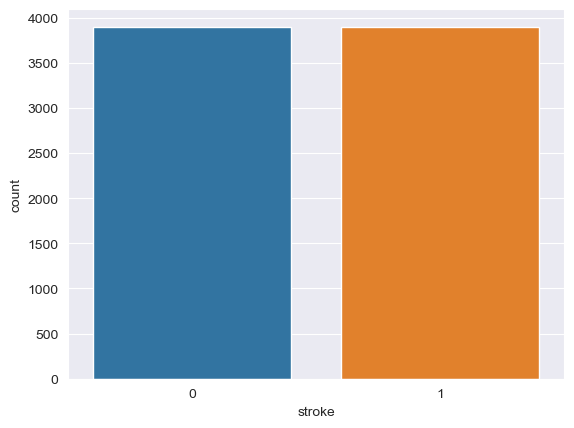

In [9]:
y_tr = pd.DataFrame({'stroke':y_train}) #y_tr is used just to draw graph
sns.countplot(data = y_tr, x = 'stroke', y= None)
plt.show()

In [10]:
###Libraries for Modedl Fitting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [11]:
### Function For ROC Curve
#Inputs are y_test and y_prob
#Make sure to calculate y_prob in each model before generating ROC curve

def plot_ROC(y_test, y_prob):
    from sklearn import metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    sns.set_theme(style = 'white')
    plt.figure(figsize = (3, 3))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [12]:
### Function For Confusion matrix

def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show(block=True)

In [13]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='l2')
logistic_model = LR.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)
class_report=classification_report(y_test,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[691 269]
 [ 12  50]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.16      0.81      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.73      0.80      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



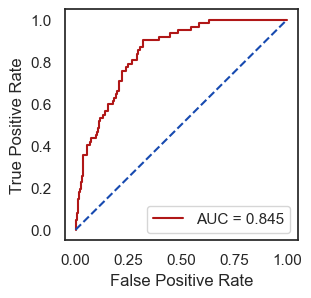

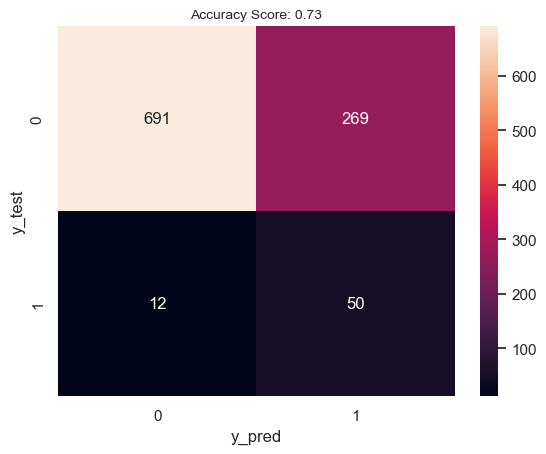

In [14]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = logistic_model.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [18]:
#Trying to check overfiitng by predicting training set

y_pred=logistic_model.predict(X_train)
class_report=classification_report(y_train,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train,y_pred))

=== Confusion Matrix ===
[[2851 1049]
 [ 715 3185]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      3900
           1       0.75      0.82      0.78      3900

    accuracy                           0.77      7800
   macro avg       0.78      0.77      0.77      7800
weighted avg       0.78      0.77      0.77      7800



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Fit a logistic regression model with L2 regularization (ridge)
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_train, y_train)


In [16]:
# calculate VIF for each predictor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Predictor"] = X_train.columns

# print the VIF values
print(vif)

    VIF Factor                       Predictor
0    13.309018                             age
1     1.341959                    hypertension
2     1.312246                   heart_disease
3     7.085158               avg_glucose_level
4    14.264013                             bmi
5     1.807787                     gender_Male
6     6.779962                ever_married_Yes
7     1.019242          work_type_Never_worked
8     4.835709               work_type_Private
9     2.483956         work_type_Self_employed
10    1.489292              work_type_children
11    2.045815            Residence_type_Urban
12    2.317137  smoking_status_formerly_smoked
13    2.826532     smoking_status_never_smoked
14    1.869535           smoking_status_smokes


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[857 103]
 [ 40  22]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       960
           1       0.18      0.35      0.24        62

    accuracy                           0.86      1022
   macro avg       0.57      0.62      0.58      1022
weighted avg       0.91      0.86      0.88      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [20]:
svc = SVC(random_state = 42, probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[699 261]
 [ 15  47]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022



In [17]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[701 259]
 [ 11  51]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.82      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.93      0.74      0.80      1022



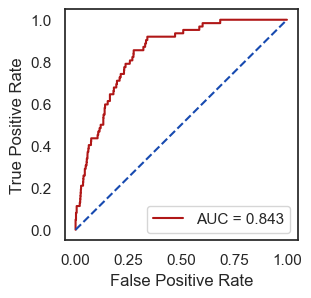

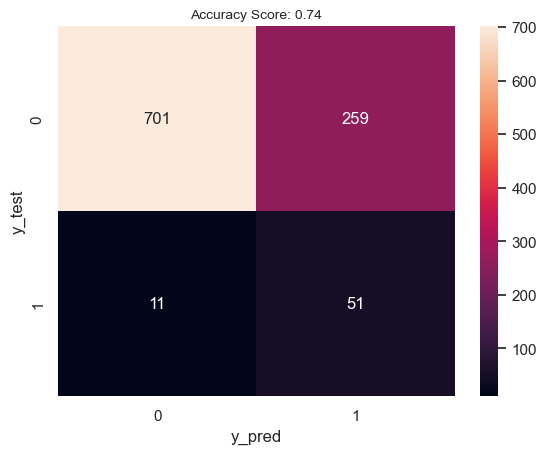

In [18]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = rf.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [15]:
xgb = XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[920  40]
 [ 50  12]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.23      0.19      0.21        62

    accuracy                           0.91      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.90      0.91      0.91      1022



In [16]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[914  46]
 [ 53   9]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.16      0.15      0.15        62

    accuracy                           0.90      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022

